In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:

df = pd.read_csv('creditcard.csv')

print("DATASET OVERVIEW")
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes.value_counts()}")

print("\nMISSING VALUES CHECK")
print(df.isnull().sum().sum(), "total missing values")
print(df.isnull().sum()[df.isnull().sum() > 0])

DATASET OVERVIEW
Dataset shape: (134763, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data types:
float64    30
int64       1
Name: count, dtype: int64

MISSING VALUES CHECK
9 total missing values
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64



TARGET VARIABLE DISTRIBUTION
Class
0.0    134500
1.0       262
Name: count, dtype: int64

Fraud percentage: 0.1944%
Normal percentage: 99.8048%


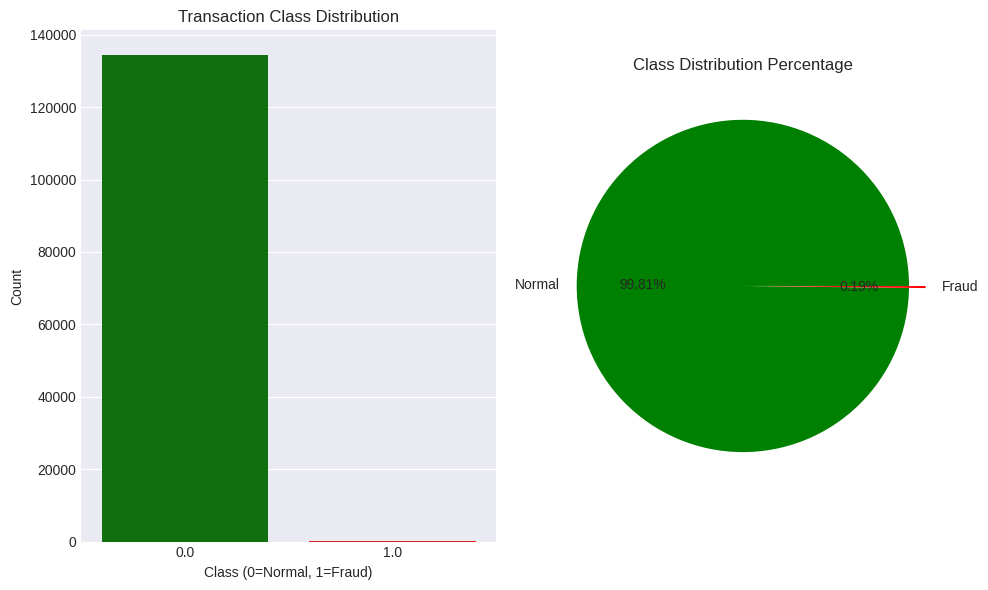

In [4]:
print("\nTARGET VARIABLE DISTRIBUTION")
class_dist = df['Class'].value_counts()
print(class_dist)
print(f"\nFraud percentage: {class_dist[1]/len(df)*100:.4f}%")
print(f"Normal percentage: {class_dist[0]/len(df)*100:.4f}%")

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=df, palette=['green', 'red'])
plt.title('Transaction Class Distribution')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(class_dist.values, labels=['Normal', 'Fraud'],
        autopct='%1.2f%%', colors=['green', 'red'],
        explode=[0, 0.1])
plt.title('Class Distribution Percentage')
plt.tight_layout()
plt.show()

SUMMARY STATISTICS: NORMAL VS FRAUDULENT TRANSACTIONS

Normal transactions:
Count: 134,500
Amount stats:
 Min: $0.00
 Max: $19656.53
 Mean: $91.87
 Std: $249.30

Fraudulent transactions:
Count: 262
Amount stats:
 Min: $0.00
 Max: $1809.68
 Mean: $116.24
 Std: $245.93


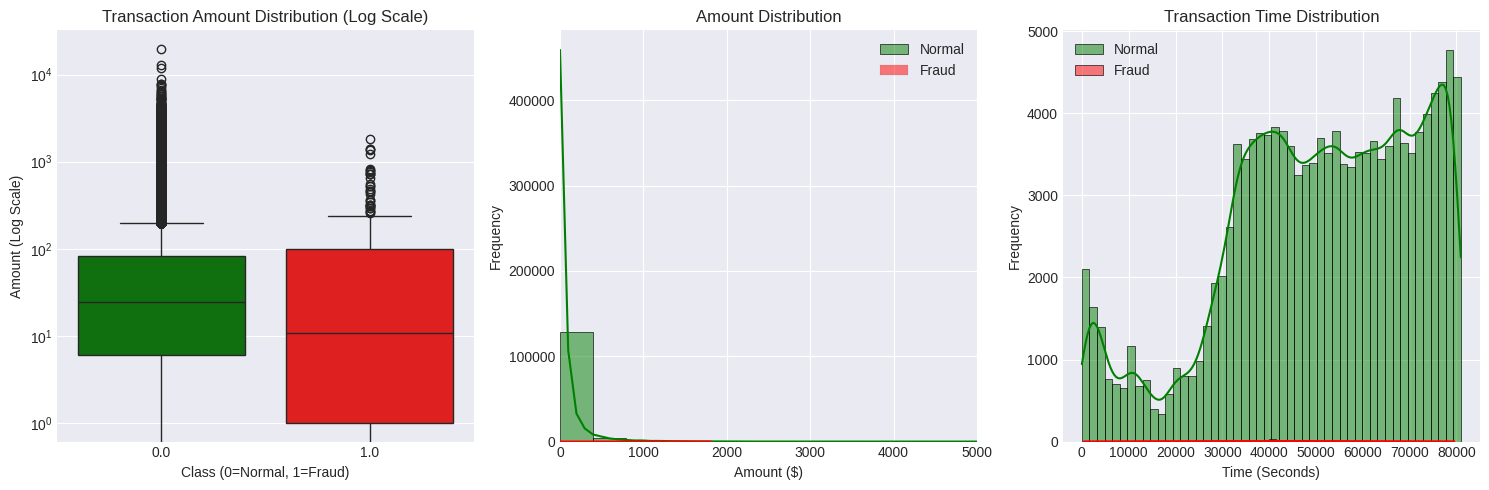

In [5]:
# Summary statistics for normal vs fraudulent transactions
print("SUMMARY STATISTICS: NORMAL VS FRAUDULENT TRANSACTIONS")

# Separate normal and fraudulent transactions
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

print("\nNormal transactions:")
print(f"Count: {len(normal):,}")
print(f"Amount stats:\n Min: ${normal['Amount'].min():.2f}")
print(f" Max: ${normal['Amount'].max():.2f}")
print(f" Mean: ${normal['Amount'].mean():.2f}")
print(f" Std: ${normal['Amount'].std():.2f}")

print("\nFraudulent transactions:")
print(f"Count: {len(fraud):,}")
print(f"Amount stats:\n Min: ${fraud['Amount'].min():.2f}")
print(f" Max: ${fraud['Amount'].max():.2f}")
print(f" Mean: ${fraud['Amount'].mean():.2f}")
print(f" Std: ${fraud['Amount'].std():.2f}")

# Amount distribution comparison
plt.figure(figsize=(15, 5))

# Box plot
plt.subplot(1, 3, 1)
sns.boxplot(x='Class', y='Amount', data=df, palette=['green', 'red'])
plt.yscale('log')  # Log scale for better visualization
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Amount (Log Scale)')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(data=normal, x='Amount', bins=50, color='green',
             alpha=0.5, label='Normal', kde=True)
sns.histplot(data=fraud, x='Amount', bins=50, color='red',
             alpha=0.5, label='Fraud', kde=True)
plt.xlim(0, 5000)  # Limit x-axis for better visualization
plt.title('Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.legend()

# Time distribution
plt.subplot(1, 3, 3)
sns.histplot(data=normal, x='Time', bins=50, color='green',
             alpha=0.5, label='Normal', kde=True)
sns.histplot(data=fraud, x='Time', bins=50, color='red',
             alpha=0.5, label='Fraud', kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

PART 3: DATA PROCESSING

In [6]:
# PART 3: DATA PREPROCESSING FOR FULL DATASET
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

print("DATA PREPROCESSING")

# Clean any missing values (though full dataset shouldn't have any)
df_clean = df.dropna()
if len(df) != len(df_clean):
    print(f"Dropped {len(df) - len(df_clean)} rows with missing values")
df = df_clean

X = df.drop('Class', axis=1)
y = df['Class'].astype(int)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Fraud percentage in full data: {(y == 1).mean()*100:.3f}%")

print("\nScaling numerical features...")
scaler = RobustScaler()

# The full dataset has 'Time' and 'Amount' as the only non-PCA features
X_scaled = X.copy()
X_scaled[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])
print(" Scaled 'Time' and 'Amount' using RobustScaler")

X = X_scaled

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Train fraud percentage: {y_train.mean()*100:.4f}%")
print(f"Test fraud percentage: {y_test.mean()*100:.4f}%")

# Handle class imbalance
print("HANDLING CLASS IMBALANCE")

print("\nOriginal class distribution in training set:")
train_normal = (y_train == 0).sum()
train_fraud = (y_train == 1).sum()
print(f"Class 0 (Normal): {train_normal:,}")
print(f"Class 1 (Fraud): {train_fraud:,}")
print(f"Ratio (Normal:Fraud): {train_normal/train_fraud:.1f}:1")

# Apply SMOTE
try:
    # Target 10% fraud in training (much more balanced but still realistic)
    smote = SMOTE(random_state=42, sampling_strategy=0.1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    smote_normal = (y_train_smote == 0).sum()
    smote_fraud = (y_train_smote == 1).sum()

    print(" SMOTE applied successfully")
    print(f"After SMOTE - Normal: {smote_normal:,}")
    print(f"After SMOTE - Fraud: {smote_fraud:,}")
    print(f"New ratio: {smote_normal/smote_fraud:.1f}:1")
    print(f"Fraud percentage after SMOTE: {(y_train_smote == 1).mean()*100:.2f}%")

except Exception as e:
    print(f"SMOTE Error: {e}")
    print("Using original training data")
    X_train_smote, y_train_smote = X_train.copy(), y_train.copy()

# Apply Random Under Sampling
print("\nApplying Random Under Sampling...")
try:
    rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

    under_normal = (y_train_under == 0).sum()
    under_fraud = (y_train_under == 1).sum()

    print(" Random Under Sampling applied successfully")
    print(f"After Under Sampling - Normal: {under_normal:,}")
    print(f"After Under Sampling - Fraud: {under_fraud:,}")
    print(f"New ratio: {under_normal/under_fraud:.1f}:1")

except Exception as e:
    print(f"Under Sampling Error: {e}")
    print("Using original training data")
    X_train_under, y_train_under = X_train.copy(), y_train.copy()

print("PREPROCESSING COMPLETE")
print(f"\nTraining datasets available:")
print(f"1. Original: {X_train.shape[0]:,} samples")
print(f"2. SMOTE-balanced: {X_train_smote.shape[0]:,} samples")
print(f"3. Undersampled: {X_train_under.shape[0]:,} samples")

DATA PREPROCESSING
Dropped 1 rows with missing values
Features shape: (134762, 30)
Target shape: (134762,)
Fraud percentage in full data: 0.194%

Scaling numerical features...
 Scaled 'Time' and 'Amount' using RobustScaler

Train set shape: (107809, 30)
Test set shape: (26953, 30)
Train fraud percentage: 0.1948%
Test fraud percentage: 0.1929%
HANDLING CLASS IMBALANCE

Original class distribution in training set:
Class 0 (Normal): 107,599
Class 1 (Fraud): 210
Ratio (Normal:Fraud): 512.4:1
 SMOTE applied successfully
After SMOTE - Normal: 107,599
After SMOTE - Fraud: 10,759
New ratio: 10.0:1
Fraud percentage after SMOTE: 9.09%

Applying Random Under Sampling...
 Random Under Sampling applied successfully
After Under Sampling - Normal: 420
After Under Sampling - Fraud: 210
New ratio: 2.0:1
PREPROCESSING COMPLETE

Training datasets available:
1. Original: 107,809 samples
2. SMOTE-balanced: 118,358 samples
3. Undersampled: 630 samples


Part 4: Model Building - Supervised Learning

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import time

print("MODEL TRAINING - SUPERVISED LEARNING")

# Dictionary to store models and their results
models = {}
results = {}

# 1. Logistic Regression
print("\n1. Training Logistic Regression...")
start_time = time.time()
lr_model = LogisticRegression(
    class_weight='balanced',  # Adjusts for class imbalance
    max_iter=1000,
    random_state=42,
    solver='liblinear'
)
lr_model.fit(X_train_smote, y_train_smote)
lr_time = time.time() - start_time
models['Logistic Regression'] = lr_model
print(f" Completed in {lr_time:.2f} seconds")

# 2. Random Forest
print("\n2. Training Random Forest Classifier...")
start_time = time.time()
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced_subsample',
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)
rf_model.fit(X_train_smote, y_train_smote)
rf_time = time.time() - start_time
models['Random Forest'] = rf_model
print(f" Completed in {rf_time:.2f} seconds")

# 3. Support Vector Machine (Linear)
print("\n3. Training Support Vector Machine...")
start_time = time.time()
svm_model = SVC(
    class_weight='balanced',
    kernel='linear',
    probability=True,
    random_state=42
)
svm_model.fit(X_train_under, y_train_under)  # Use undersampled data for SVM
svm_time = time.time() - start_time
models['SVM'] = svm_model
print(f" Completed in {svm_time:.2f} seconds")

# Evaluate all models
print("\n" + "=" * 60)
print("MODEL EVALUATION")
print("=" * 60)

for model_name, model in models.items():
    print(f"\n{model_name}")
    print("-" * 40)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)

    print(f"AUC-ROC Score: {auc_score:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

    # Store results
    results[model_name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'auc': auc_score
    }

MODEL TRAINING - SUPERVISED LEARNING

1. Training Logistic Regression...
 Completed in 3.31 seconds

2. Training Random Forest Classifier...
 Completed in 69.54 seconds

3. Training Support Vector Machine...
 Completed in 0.06 seconds

MODEL EVALUATION

Logistic Regression
----------------------------------------
AUC-ROC Score: 0.9782

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     26901
       Fraud       0.07      0.92      0.12        52

    accuracy                           0.97     26953
   macro avg       0.53      0.95      0.55     26953
weighted avg       1.00      0.97      0.99     26953


Random Forest
----------------------------------------
AUC-ROC Score: 0.9949

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     26901
       Fraud       0.49      0.83      0.61        52

    accuracy                           1.00   

Part 5: Model Building - Anomaly Detection (Unsupervised)


In [8]:
print("ANOMALY DETECTION - UNSUPERVISED LEARNING")

# Since fraud is anomaly, we'll use Isolation Forest
print("\nTraining Isolation Forest...")
start_time = time.time()

# Prepare data (only normal transactions for training)
X_train_normal = X_train[y_train == 0]

# Train Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Expected proportion of outliers
    random_state=42,
    n_jobs=-1
)
iso_forest.fit(X_train_normal)

iso_time = time.time() - start_time
print(f" Completed in {iso_time:.2f} seconds")

# Make predictions (-1 for outliers, 1 for inliers)
y_pred_iso = iso_forest.predict(X_test)
# Convert to binary (0=normal, 1=fraud)
y_pred_iso_binary = np.where(y_pred_iso == -1, 1, 0)

print("\nIsolation Forest Results:")
print("-" * 40)
print(f"Predicted anomalies: {sum(y_pred_iso_binary == 1):,}")
print(f"Actual frauds: {sum(y_test == 1):,}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_iso_binary,
                           target_names=['Normal', 'Fraud']))

# Store results
results['Isolation Forest'] = {
    'y_pred': y_pred_iso_binary,
    'y_pred_proba': None,  # Isolation Forest doesn't give probabilities
    'auc': roc_auc_score(y_test, y_pred_iso_binary) if hasattr(iso_forest, 'decision_function') else None
}

ANOMALY DETECTION - UNSUPERVISED LEARNING

Training Isolation Forest...
 Completed in 1.02 seconds

Isolation Forest Results:
----------------------------------------
Predicted anomalies: 296
Actual frauds: 52

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     26901
       Fraud       0.10      0.56      0.17        52

    accuracy                           0.99     26953
   macro avg       0.55      0.77      0.58     26953
weighted avg       1.00      0.99      0.99     26953



Part 6: Model Evaluation & Comparison

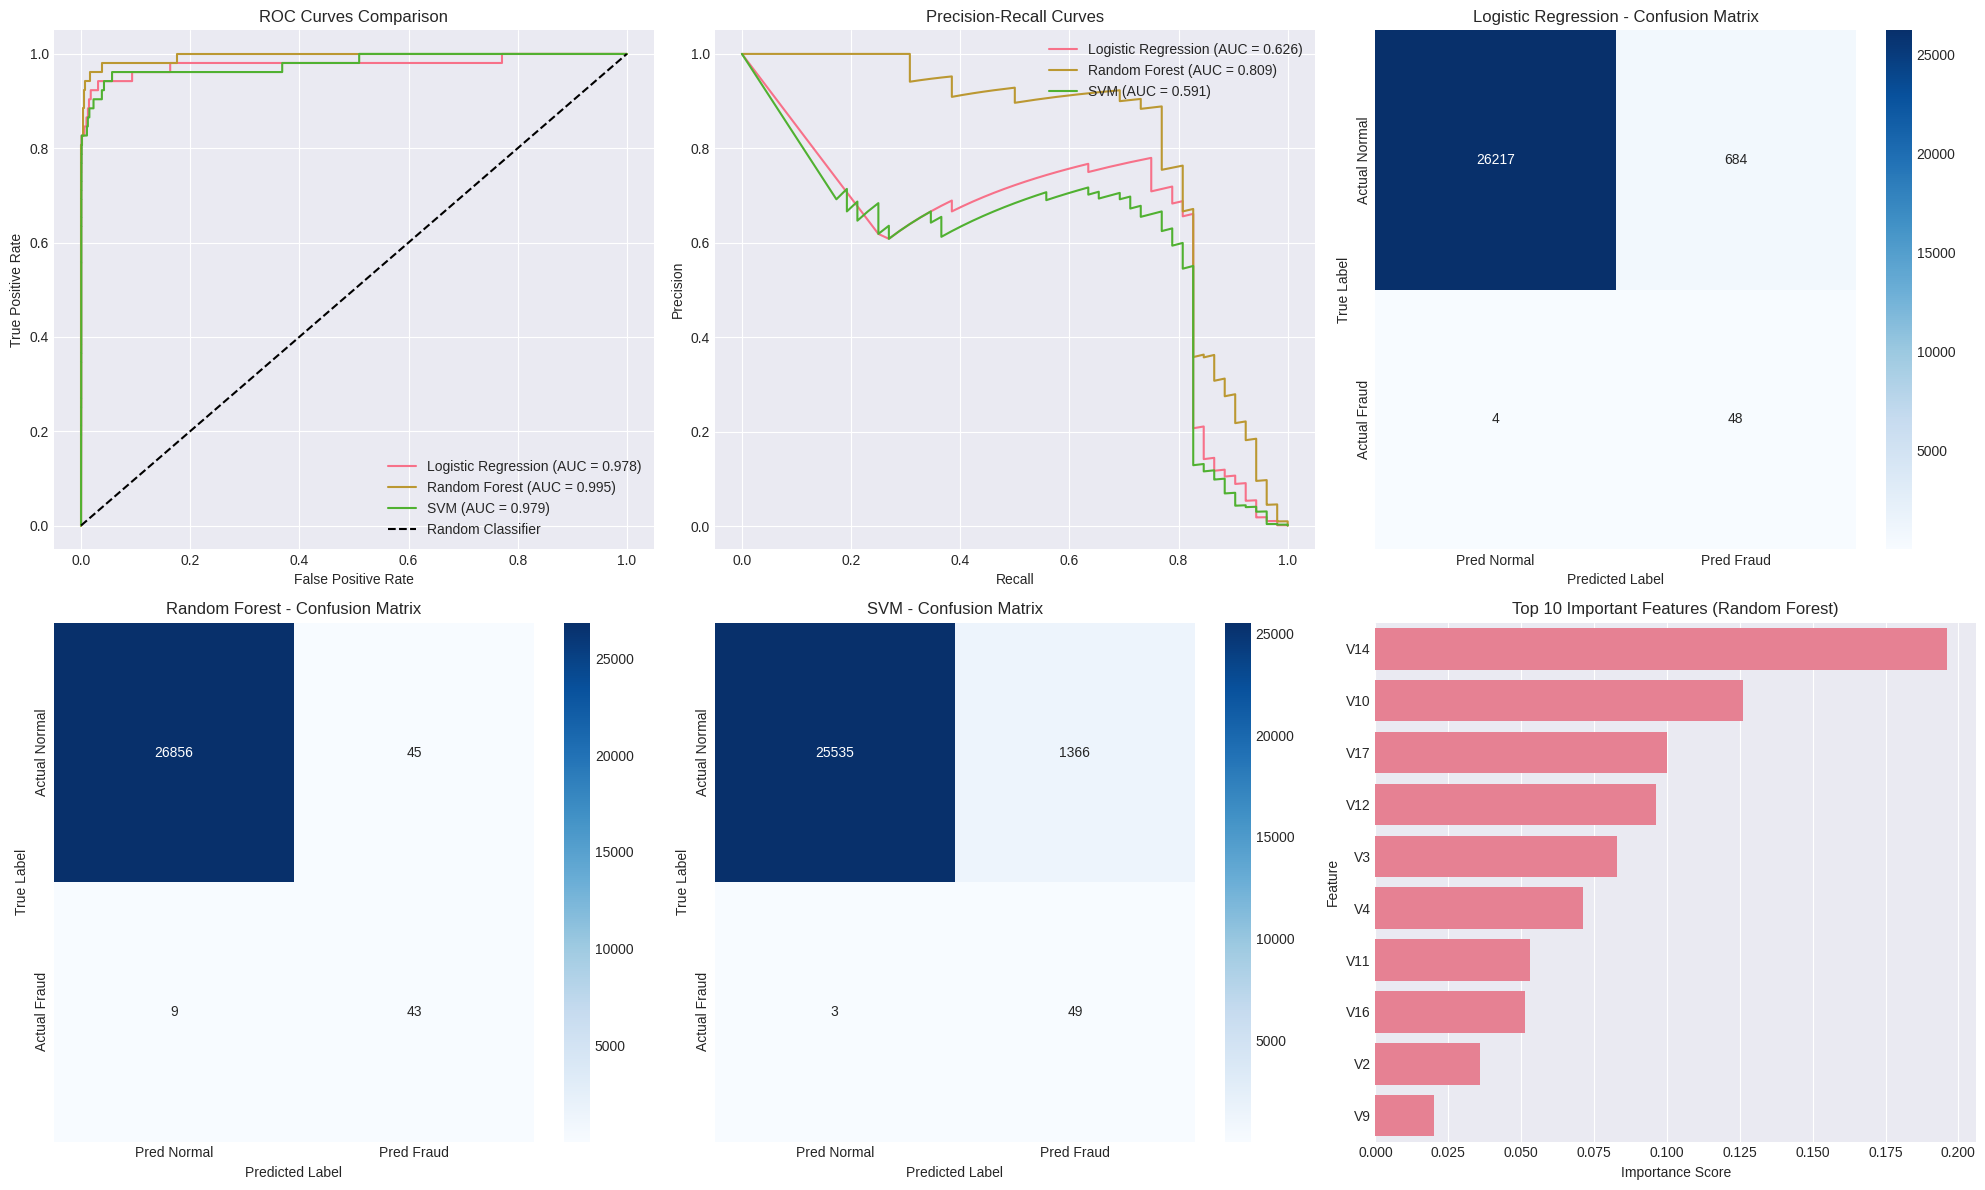


MODEL PERFORMANCE SUMMARY
              Model Accuracy Precision Recall F1-Score AUC-ROC  False Positives  False Negatives  True Positives  True Negatives
Logistic Regression   0.9745    0.0656 0.9231   0.1224  0.9782              684                4              48           26217
      Random Forest   0.9980    0.4886 0.8269   0.6143  0.9949               45                9              43           26856
                SVM   0.9492    0.0346 0.9423   0.0668  0.9790             1366                3              49           25535
   Isolation Forest   0.9892    0.0980 0.5577   0.1667  0.7739              267               23              29           26634


In [9]:
# Visual comparison of all models
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. ROC Curves
ax = axes[0, 0]
for model_name, result in results.items():
    if result['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        auc_score = result['auc']
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves Comparison')
ax.legend(loc='lower right')
ax.grid(True)

# 2. Precision-Recall Curves
ax = axes[0, 1]
for model_name, result in results.items():
    if result['y_pred_proba'] is not None:
        precision, recall, _ = precision_recall_curve(y_test, result['y_pred_proba'])
        pr_auc = auc(recall, precision)
        ax.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.3f})')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves')
ax.legend(loc='upper right')
ax.grid(True)

# 3. Confusion Matrices for top 3 models
top_models = list(results.keys())[:3]
for idx, model_name in enumerate(top_models):
    ax = axes[0, 2] if idx == 0 else axes[1, idx-1]

    cm = confusion_matrix(y_test, results[model_name]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred Normal', 'Pred Fraud'],
                yticklabels=['Actual Normal', 'Actual Fraud'], ax=ax)
    ax.set_title(f'{model_name} - Confusion Matrix')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

# 4. Feature Importance (Random Forest only)
if 'Random Forest' in models:
    ax = axes[1, 2]
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': models['Random Forest'].feature_importances_
    }).sort_values('importance', ascending=False).head(10)

    sns.barplot(data=feature_importance, x='importance', y='feature', ax=ax)
    ax.set_title('Top 10 Important Features (Random Forest)')
    ax.set_xlabel('Importance Score')
    ax.set_ylabel('Feature')

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "=" * 60)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 60)

summary_data = []
for model_name, result in results.items():
    cm = confusion_matrix(y_test, result['y_pred'])
    tn, fp, fn, tp = cm.ravel()

    # Calculate key metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    summary_data.append({
        'Model': model_name,
        'Accuracy': f"{accuracy:.4f}",
        'Precision': f"{precision:.4f}",
        'Recall': f"{recall:.4f}",
        'F1-Score': f"{f1:.4f}",
        'AUC-ROC': f"{result['auc']:.4f}" if result['auc'] else 'N/A',
        'False Positives': fp,
        'False Negatives': fn,
        'True Positives': tp,
        'True Negatives': tn
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

Part 7: Business Impact Analysis & Deployment Preparation

BUSINESS IMPACT ANALYSIS
Business Assumptions:
• Average fraud amount: $116.24
• Cost per false alarm (customer service): $5
• Annual revenue per customer: $1000
• Fraud prevention multiplier: 2x
  (Preventing fraud has additional benefits beyond immediate loss)

----------------------------------------

Business Impact Analysis:
              Model  Fraud Caught  Fraud Missed  False Alarms Money Saved ($) False Alarm Cost ($) Missed Fraud Cost ($) Investigation Cost ($) Net Benefit ($) ROI (%) Cost per Detected Fraud ($)
Logistic Regression            48             4           684          11,159                3,420                   465                  7,320          -3,466  -23.7%                         305
      Random Forest            43             9            45           9,996                  225                 1,046                    880           7,620  320.7%                          55
                SVM            49             3          1366          11,391   

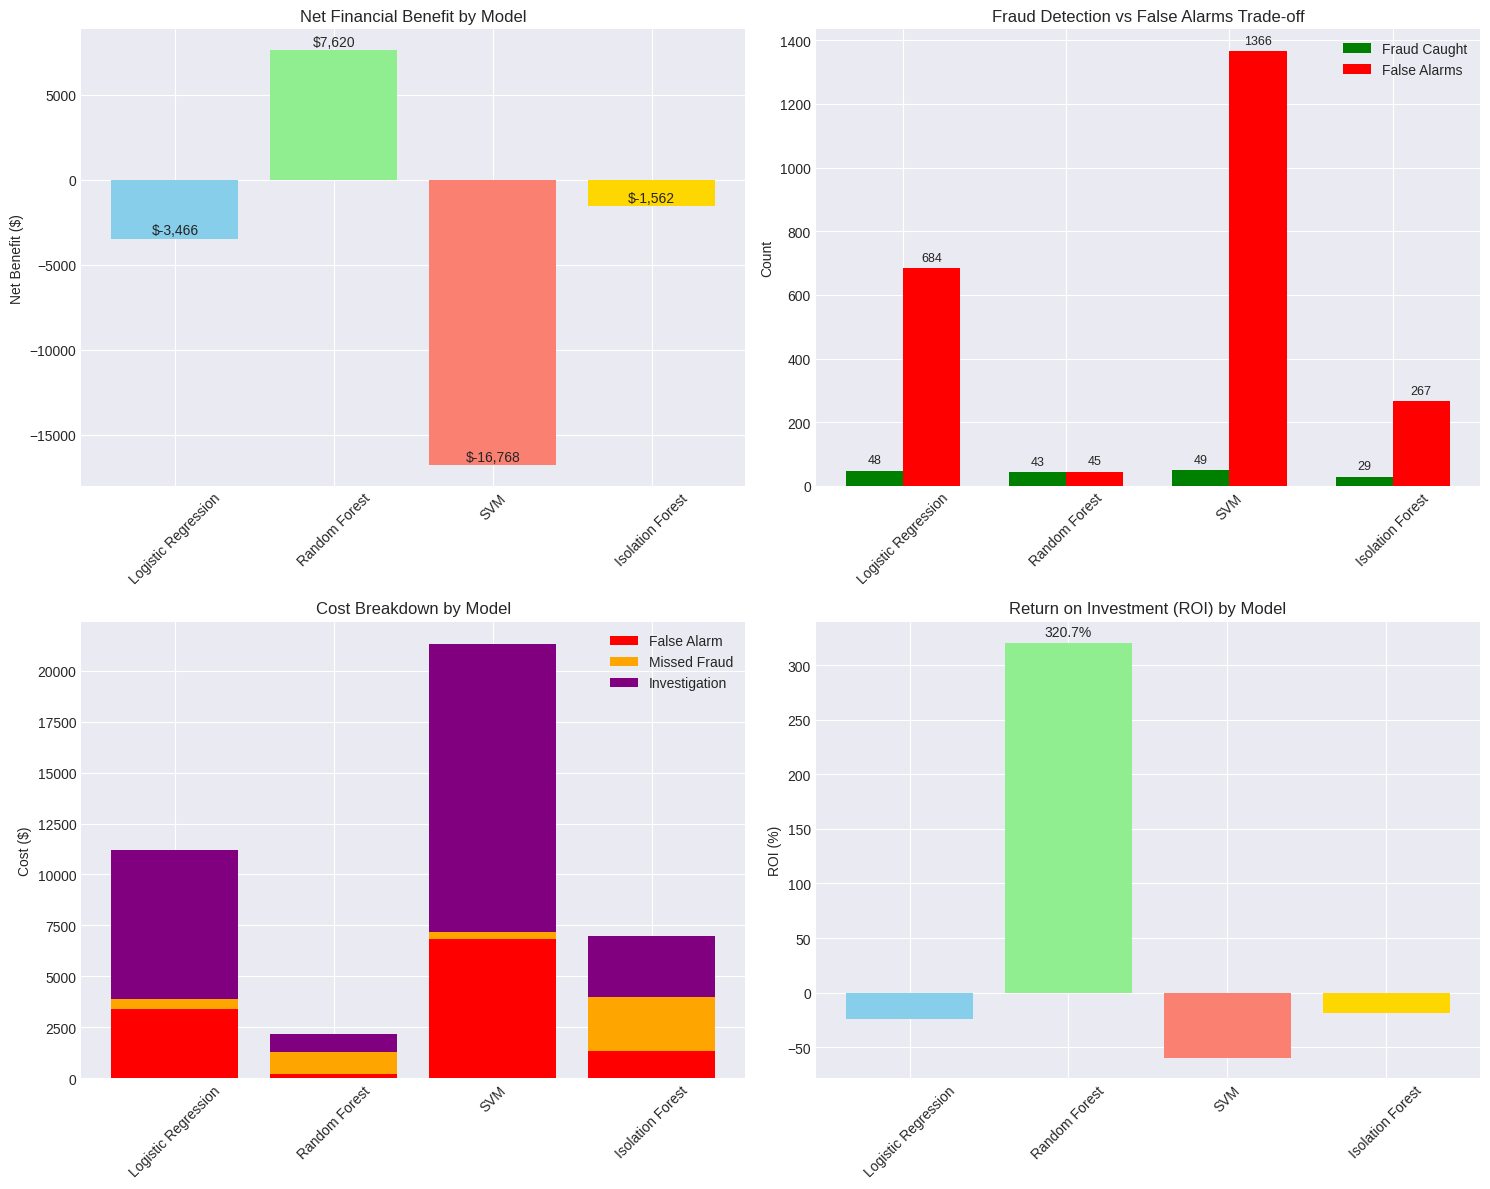


REAL-TIME FEATURE ENGINEERING IDEAS
 1. Transaction amount vs customer's 30-day average
 2. Time since last transaction
 3. Geographic velocity (distance from last transaction in miles/hour)
 4. Device fingerprint change (new device detection)
 5. Transaction frequency (transactions in last hour)
 6. Merchant category risk score (high-risk vs low-risk merchants)
 7. Time of day (transactions at unusual hours)
 8. Amount deviation from typical spending pattern
 9. IP address geolocation mismatch
10. Billing/shipping address mismatch
11. Card not present vs card present transactions
12. Cross-border transaction flags

MODEL DEPLOYMENT PREPARATION

Selected best model: SVM
Recall score: 0.942
Precision score: 0.035
F1-score: 0.067

 Model saved as 'best_fraud_detection_model.joblib'
 Scaler saved as 'robust_scaler.joblib'
 Model metadata saved as 'model_metadata.json'

EXAMPLE PREDICTION

Sample Transaction 1: Normal Transaction
Prediction: {'is_fraud': False, 'fraud_probability': 0.0786

In [12]:
# PART 7: Business Impact Analysis & Deployment Preparation
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

print("BUSINESS IMPACT ANALYSIS")

# Business assumptions (adjust based on your domain knowledge)
avg_fraud_amount = fraud['Amount'].mean()
cost_per_false_positive = 5  # Customer service cost in dollars
revenue_per_customer = 1000  # Annual revenue per customer
fraud_prevention_benefit_multiplier = 2  # Additional savings from preventing future fraud

print(f"Business Assumptions:")
print(f"• Average fraud amount: ${avg_fraud_amount:.2f}")
print(f"• Cost per false alarm (customer service): ${cost_per_false_positive}")
print(f"• Annual revenue per customer: ${revenue_per_customer}")
print(f"• Fraud prevention multiplier: {fraud_prevention_benefit_multiplier}x")
print("  (Preventing fraud has additional benefits beyond immediate loss)")
print("\n" + "-" * 40)

# Calculate business metrics for each model
business_results = []

for model_name in results.keys():
    if model_name in results:
        y_pred = results[model_name]['y_pred']

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Financial impact calculations
        money_saved = tp * avg_fraud_amount * fraud_prevention_benefit_multiplier
        false_alarm_cost = fp * cost_per_false_positive
        missed_fraud_cost = fn * avg_fraud_amount

        # Customer impact (assuming 0.5% of false positives lead to churn)
        churn_rate = 0.005
        potential_churn = fp * churn_rate
        lost_revenue = potential_churn * revenue_per_customer

        # Investigation costs (assuming $10 per investigation)
        investigation_cost_per_case = 10
        investigation_cost = (tp + fp) * investigation_cost_per_case

        total_cost = false_alarm_cost + missed_fraud_cost + lost_revenue + investigation_cost
        net_benefit = money_saved - total_cost

        # Calculate ROI
        roi = (net_benefit / total_cost * 100) if total_cost > 0 else float('inf')

        # Calculate cost per detected fraud
        cost_per_detected_fraud = total_cost / tp if tp > 0 else float('inf')

        business_results.append({
            'Model': model_name,
            'Fraud Caught': tp,
            'Fraud Missed': fn,
            'False Alarms': fp,
            'Money Saved ($)': f"{money_saved:,.0f}",
            'False Alarm Cost ($)': f"{false_alarm_cost:,.0f}",
            'Missed Fraud Cost ($)': f"{missed_fraud_cost:,.0f}",
            'Investigation Cost ($)': f"{investigation_cost:,.0f}",
            'Net Benefit ($)': f"{net_benefit:,.0f}",
            'ROI (%)': f"{roi:.1f}%" if roi != float('inf') else "N/A",
            'Cost per Detected Fraud ($)': f"{cost_per_detected_fraud:.0f}" if cost_per_detected_fraud != float('inf') else "N/A"
        })

business_df = pd.DataFrame(business_results)
print("\nBusiness Impact Analysis:")
print(business_df.to_string(index=False))

# Visualize business impact
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Net Benefit Comparison
ax = axes[0, 0]
models_list = business_df['Model'].tolist()
net_benefits = [float(b['Net Benefit ($)'].replace(',', '')) for b in business_results]
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']
bars = ax.bar(models_list, net_benefits, color=colors[:len(models_list)])
ax.set_ylabel('Net Benefit ($)')
ax.set_title('Net Financial Benefit by Model')
ax.set_xticklabels(models_list, rotation=45)
# Add value labels on bars
for bar, value in zip(bars, net_benefits):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(net_benefits)*0.01,
            f'${value:,.0f}', ha='center', va='bottom', fontsize=10)

# 2. Fraud Detection vs False Alarms
ax = axes[0, 1]
fraud_caught = [b['Fraud Caught'] for b in business_results]
false_alarms = [b['False Alarms'] for b in business_results]
x = np.arange(len(models_list))
width = 0.35
bars1 = ax.bar(x - width/2, fraud_caught, width, label='Fraud Caught', color='green')
bars2 = ax.bar(x + width/2, false_alarms, width, label='False Alarms', color='red')
ax.set_ylabel('Count')
ax.set_title('Fraud Detection vs False Alarms Trade-off')
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45)
ax.legend()
# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + max(fraud_caught + false_alarms)*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 3. Cost Breakdown
ax = axes[1, 0]
cost_types = ['False Alarm', 'Missed Fraud', 'Investigation']
bottom = np.zeros(len(models_list))
colors_cost = ['red', 'orange', 'purple']
for i, cost_type in enumerate(cost_types):
    if cost_type == 'False Alarm':
        values = [float(b['False Alarm Cost ($)'].replace(',', '')) for b in business_results]
    elif cost_type == 'Missed Fraud':
        values = [float(b['Missed Fraud Cost ($)'].replace(',', '')) for b in business_results]
    else:
        values = [float(b['Investigation Cost ($)'].replace(',', '')) for b in business_results]

    ax.bar(models_list, values, bottom=bottom, label=cost_type, color=colors_cost[i])
    bottom += values

ax.set_ylabel('Cost ($)')
ax.set_title('Cost Breakdown by Model')
ax.set_xticklabels(models_list, rotation=45)
ax.legend()

# 4. ROI Comparison
ax = axes[1, 1]
roi_values = []
for b in business_results:
    if b['ROI (%)'] != 'N/A':
        roi_values.append(float(b['ROI (%)'].replace('%', '')))
    else:
        roi_values.append(0)

bars = ax.bar(models_list, roi_values, color=['skyblue', 'lightgreen', 'salmon', 'gold'][:len(models_list)])
ax.set_ylabel('ROI (%)')
ax.set_title('Return on Investment (ROI) by Model')
ax.set_xticklabels(models_list, rotation=45)
# Add ROI labels
for bar, value in zip(bars, roi_values):
    if value > 0:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(roi_values)*0.01,
                f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Feature engineering for real-time detection
print("\n" + "=" * 60)
print("REAL-TIME FEATURE ENGINEERING IDEAS")
print("=" * 60)

real_time_features = [
    "Transaction amount vs customer's 30-day average",
    "Time since last transaction",
    "Geographic velocity (distance from last transaction in miles/hour)",
    "Device fingerprint change (new device detection)",
    "Transaction frequency (transactions in last hour)",
    "Merchant category risk score (high-risk vs low-risk merchants)",
    "Time of day (transactions at unusual hours)",
    "Amount deviation from typical spending pattern",
    "IP address geolocation mismatch",
    "Billing/shipping address mismatch",
    "Card not present vs card present transactions",
    "Cross-border transaction flags"
]

for i, feature in enumerate(real_time_features, 1):
    print(f"{i:2}. {feature}")

print("\n" + "=" * 60)
print("MODEL DEPLOYMENT PREPARATION")
print("=" * 60)

# Select best model based on recall (most important for fraud detection)
best_model_name = max(results.keys(),
                      key=lambda x: recall_score(y_test, results[x]['y_pred']))
best_model = models.get(best_model_name, list(models.values())[0])

print(f"\nSelected best model: {best_model_name}")
print(f"Recall score: {recall_score(y_test, results[best_model_name]['y_pred']):.3f}")
print(f"Precision score: {precision_score(y_test, results[best_model_name]['y_pred']):.3f}")
print(f"F1-score: {f1_score(y_test, results[best_model_name]['y_pred']):.3f}")

# Save the model (optional - using joblib or pickle)
import joblib
import pickle

# Save with joblib (more efficient for numpy arrays)
joblib.dump(best_model, 'best_fraud_detection_model.joblib')
print("\n Model saved as 'best_fraud_detection_model.joblib'")

# Save the scaler as well
joblib.dump(scaler, 'robust_scaler.joblib')
print(" Scaler saved as 'robust_scaler.joblib'")

# Save metadata about the model
model_metadata = {
    'model_name': best_model_name,
    'model_type': type(best_model).__name__,
    'features_used': X.columns.tolist(),
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
    'performance_metrics': {
        'recall': float(recall_score(y_test, results[best_model_name]['y_pred'])),
        'precision': float(precision_score(y_test, results[best_model_name]['y_pred'])),
        'f1_score': float(f1_score(y_test, results[best_model_name]['y_pred'])),
        'accuracy': float(accuracy_score(y_test, results[best_model_name]['y_pred'])),
        'auc_roc': float(results[best_model_name]['auc'])
    },
    'threshold_used': 0.5,
    'imbalance_handling': 'SMOTE'
}

with open('model_metadata.json', 'w') as f:
    import json
    json.dump(model_metadata, f, indent=2)
print(" Model metadata saved as 'model_metadata.json'")

# Create a simple prediction function for demonstration
def predict_fraud(transaction_features, model=best_model, scaler=scaler, threshold=0.5):
    """
    Predict if a transaction is fraudulent

    Parameters:
    transaction_features: Dictionary of feature values
    model: Trained model
    scaler: Fitted scaler
    threshold: Probability threshold for classification

    Returns:
    Dictionary with prediction and risk score
    """
    # Convert to DataFrame with correct column order
    features_df = pd.DataFrame([transaction_features])

    # Ensure all required columns are present
    expected_columns = X.columns.tolist()
    for col in expected_columns:
        if col not in features_df.columns:
            features_df[col] = 0  # Fill missing with 0

    # Reorder columns to match training
    features_df = features_df[expected_columns]

    # Scale 'Time' and 'Amount' features
    if 'Time' in features_df.columns and 'Amount' in features_df.columns:
        features_df[['Time', 'Amount']] = scaler.transform(features_df[['Time', 'Amount']])

    # Predict
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(features_df)[0, 1]
        is_fraud = proba > threshold
        fraud_probability = float(proba)
    else:
        is_fraud = model.predict(features_df)[0] == 1
        fraud_probability = None

    # Determine risk level
    if fraud_probability is not None:
        if fraud_probability > 0.8:
            risk_level = 'HIGH'
            action = 'BLOCK & ALERT'
        elif fraud_probability > 0.5:
            risk_level = 'MEDIUM'
            action = 'REVIEW REQUIRED'
        else:
            risk_level = 'LOW'
            action = 'PASS'
    else:
        risk_level = 'MEDIUM' if is_fraud else 'LOW'
        action = 'REVIEW REQUIRED' if is_fraud else 'PASS'

    return {
        'is_fraud': bool(is_fraud),
        'fraud_probability': fraud_probability,
        'risk_level': risk_level,
        'recommended_action': action,
        'model_used': model.__class__.__name__,
        'threshold_used': threshold
    }

# Example usage
print("\n" + "=" * 60)
print("EXAMPLE PREDICTION")
print("=" * 60)

# Create a sample transaction (based on dataset statistics)
print("\nSample Transaction 1: Normal Transaction")
normal_transaction = {
    'Time': 50000,
    'V1': -1.359807, 'V2': -0.072781, 'V3': 2.536347,
    'V4': 1.378155, 'V5': -0.338321, 'V6': 0.462388,
    'V7': 0.239599, 'V8': 0.098698, 'V9': 0.363787,
    'V10': 0.090794, 'V11': -0.551600, 'V12': -0.617801,
    'V13': -0.991390, 'V14': -0.311169, 'V15': 1.468177,
    'V16': -0.470401, 'V17': 0.207971, 'V18': 0.025791,
    'V19': 0.403993, 'V20': 0.251412, 'V21': -0.018307,
    'V22': 0.277838, 'V23': -0.110474, 'V24': 0.066928,
    'V25': 0.128539, 'V26': -0.189115, 'V27': 0.133558,
    'V28': -0.021053, 'Amount': 149.62  # Normal amount
}

prediction_normal = predict_fraud(normal_transaction, threshold=0.3)  # Lower threshold for more sensitivity
print(f"Prediction: {prediction_normal}")

print("\nSample Transaction 2: Suspicious Transaction")
suspicious_transaction = {
    'Time': 80000,
    'V1': -5.0,  # Extreme value
    'V2': 2.0, 'V3': -3.5, 'V4': 4.2, 'V5': -2.8,
    'V6': 1.5, 'V7': -3.2, 'V8': 2.8, 'V9': -4.1,
    'V10': 3.0, 'V11': -5.5, 'V12': 4.8, 'V13': -6.2,
    'V14': 5.1, 'V15': -4.9, 'V16': 3.7, 'V17': -5.8,
    'V18': 2.9, 'V19': -4.5, 'V20': 3.8, 'V21': -6.1,
    'V22': 4.9, 'V23': -5.3, 'V24': 3.2, 'V25': -4.8,
    'V26': 2.7, 'V27': -5.7, 'V28': 4.5,
    'Amount': 2500.00  # Large amount
}

prediction_suspicious = predict_fraud(suspicious_transaction, threshold=0.3)
print(f"Prediction: {prediction_suspicious}")

# Deployment recommendations
print("DEPLOYMENT RECOMMENDATIONS")

deployment_checklist = [
    " Model performance validation on test set",
    " Business impact analysis completed",
    " Model serialization and saving",
    " Prediction function created",
    " A/B testing plan development",
    " Monitoring pipeline setup",
    " Alert system integration",
    " Compliance documentation",
    " Team training on model usage"
]






Part 8: Advanced Techniques & Next Steps

In [11]:
print("\n" + "=" * 60)
print("ADVANCED TECHNIQUES & NEXT STEPS")
print("=" * 60)

# 1. Ensemble Methods
print("\n1. ENSEMBLE METHODS (Can improve performance):")
ensemble_techniques = [
    "Voting Classifier (Combine predictions of multiple models)",
    "Stacking (Use predictions as features for meta-model)",
    "Bagging (Multiple models on different data samples)",
    "Boosting (Sequentially correct previous errors)"
]

for tech in ensemble_techniques:
    print(f"   • {tech}")

# 2. Deep Learning Approaches
print("\n2. DEEP LEARNING APPROACHES:")
dl_approaches = [
    "Autoencoders for anomaly detection",
    "LSTM networks for sequential pattern recognition",
    "Graph Neural Networks for transaction network analysis",
    "GANs for generating synthetic fraud data"
]

for approach in dl_approaches:
    print(f"   • {approach}")

# 3. Real-time System Architecture
print("\n3. REAL-TIME SYSTEM ARCHITECTURE COMPONENTS:")
architecture = [
    "Stream Processing (Apache Kafka, Spark Streaming)",
    "Feature Store (Tecton, Feast)",
    "Model Serving (TensorFlow Serving, MLflow)",
    "Monitoring (Evidently AI, Prometheus)",
    "Feedback Loop (Human-in-the-loop validation)"
]

for component in architecture:
    print(f"   • {component}")

# 4. Production Monitoring Metrics
print("\n4. PRODUCTION MONITORING METRICS:")
monitoring_metrics = [
    "Model drift (PSI - Population Stability Index)",
    "Concept drift (Performance degradation over time)",
    "Prediction latency (P95 < 100ms for real-time)",
    "Throughput (Transactions per second)",
    "False positive rate (Keep < 0.1% for customer experience)"
]

for metric in monitoring_metrics:
    print(f"   • {metric}")

print("\n" + "=" * 60)
print("PROJECT CONCLUSION")
print("=" * 60)
print("""
Key Takeaways:
1. Fraud detection requires specialized handling of class imbalance
2. Recall is more important than precision for initial detection
3. Ensemble methods often perform better than single models
4. Real-time features significantly improve detection rates
5. Continuous monitoring and retraining are essential

Recommendations:
• Implement real-time feature engineering
• Set up feedback loop for model improvement
• Monitor business metrics alongside ML metrics
• Consider hybrid approach (rule-based + ML) for production
""")


ADVANCED TECHNIQUES & NEXT STEPS

1. ENSEMBLE METHODS (Can improve performance):
   • Voting Classifier (Combine predictions of multiple models)
   • Stacking (Use predictions as features for meta-model)
   • Bagging (Multiple models on different data samples)
   • Boosting (Sequentially correct previous errors)

2. DEEP LEARNING APPROACHES:
   • Autoencoders for anomaly detection
   • LSTM networks for sequential pattern recognition
   • Graph Neural Networks for transaction network analysis
   • GANs for generating synthetic fraud data

3. REAL-TIME SYSTEM ARCHITECTURE COMPONENTS:
   • Stream Processing (Apache Kafka, Spark Streaming)
   • Feature Store (Tecton, Feast)
   • Model Serving (TensorFlow Serving, MLflow)
   • Monitoring (Evidently AI, Prometheus)
   • Feedback Loop (Human-in-the-loop validation)

4. PRODUCTION MONITORING METRICS:
   • Model drift (PSI - Population Stability Index)
   • Concept drift (Performance degradation over time)
   • Prediction latency (P95 < 100ms